In [1]:
import tensorflow as tf, tensorflow_addons as tfa
from tensorflow.keras.models import load_model
from tensorflow.keras.layers import *
from tensorflow.keras import backend as K
from tensorflow.keras.preprocessing import image
import numpy as np
import os
import random
from PIL import Image, ImageOps
import cv2
import matplotlib.pyplot as plt
from tqdm import tqdm
from PIL import Image, ImageEnhance

os.environ['TF_FORCE_GPU_ALLOW_GROWTH'] = 'true'

In [2]:
import segmentation_models as sm

sm.set_framework('tf.keras')
sm.framework()

In [3]:
def parse_image(path, batch_size, shuffle=True):
    names = os.listdir(os.path.join(path, 'images'))
    if shuffle:
        random.shuffle(names)
    
    for i in range(len(names)//batch_size):
        rgb_, segm_ = [], []
        for i, name in enumerate(names[i * batch_size: (i + 1) * batch_size]):
            
            img_path = os.path.join(path, 'images', name)
    
            rgb = image.load_img(img_path, target_size=(W, H, D))
            rgb = image.img_to_array(rgb)
            rgb /= 255
            list_rgb.append(rgb)
        
            img_path = os.path.join(path, 'masks', name)
            segm = image.load_img(img_path, target_size=(W, H, D), color_mode = "grayscale")
            segm = image.img_to_array(segm)
            segm /= 255
            list_segm.append(segm)          
        
        yield np.array(list_rgb), np.array(list_segm)

In [4]:
def dice_coef(y_true, y_pred, smooth=1.):
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    intersection = K.sum(y_true_f * y_pred_f)
    return (2. * intersection + smooth) / (
                K.sum(y_true_f) + K.sum(y_pred_f) + smooth)

def iou(y_true, y_pred, smooth=1.):
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    intersection = K.sum(y_true_f * y_pred_f)
    return (intersection + smooth) / (K.sum(y_true_f) + K.sum(y_pred_f) - intersection + smooth)

def jaccard_coef(y_true, y_pred):
    intersection = K.sum(y_true * y_pred)
    union = K.sum(y_true + y_pred)
    jac = (intersection + 1.) / (union - intersection + 1.)
    return K.mean(jac)

def jaccard_distance(y_true, y_pred, smooth=100):
    """ Calculates mean of Jaccard distance as a loss function """
    intersection = tf.reduce_sum(y_true * y_pred, axis=(1,2))
    sum_ = tf.reduce_sum(y_true + y_pred, axis=(1,2))
    jac = (intersection + smooth) / (sum_ - intersection + smooth)
    jd =  (1 - jac) * smooth
    return tf.reduce_mean(jd)


learning_rate = 0.0001
weight_decay = 0.000001

optimizer = tfa.optimizers.AdamW(learning_rate=learning_rate, 
                                 weight_decay=weight_decay)
                     
W, H, D = 512, 512, 3
num_classes = 1
batch_size = 4

In [ ]:
train_dir =  r'F:\Crimea\data\door\train'
test_dir = r'F:\Crimea\data\door\test'
model = sm.PSPNet('efficientnetb7', input_shape=(W, H, D), classes=num_classes, activation='sigmoid', encoder_weights='imagenet')

model.compile(
    optimizer=optimizer, 
    loss=jaccard_distance,
    metrics=[jaccard_coef, dice_coef] 
)

# model.summary()

model.fit(parse_image(train_dir, batch_size), 
              steps_per_epoch=len(os.listdir(os.path.join(train_dir, 'images'))) // batch_size,
              validation_data=parse_image(test_dir, batch_size),
              epochs=100)
model.save(r'models\model_door_PSPNet.h5')

In [ ]:
model = sm.Unet('efficientnetb7', input_shape=(W, H, D), classes=num_classes, activation='sigmoid', encoder_weights='imagenet')

model.compile(
    optimizer=optimizer, 
    loss=jaccard_distance,
    metrics=[jaccard_coef, dice_coef] 
)

# model.summary()

model.fit(parse_image(train_dir, batch_size), 
              steps_per_epoch=len(os.listdir(os.path.join(train_dir, 'images'))) // batch_size,
              validation_data=parse_image(test_dir, batch_size),
              epochs=100)
model.save(r'models\model_door_Unet.h5')

In [ ]:
train_dir =  r'F:\Crimea\data\wall\train'
test_dir = r'F:\Crimea\data\wall\test'
model = sm.PSPNet('efficientnetb7', input_shape=(W, H, D), classes=num_classes, activation='sigmoid', encoder_weights='imagenet')

model.compile(
    optimizer=optimizer, 
    loss=jaccard_distance,
    metrics=[jaccard_coef, dice_coef] 
)

# model.summary()

model.fit(parse_image(train_dir, batch_size), 
              steps_per_epoch=len(os.listdir(os.path.join(train_dir, 'images'))) // batch_size,
              validation_data=parse_image(test_dir, batch_size),
              epochs=100)
model.save(r'models\model_wall_PSPNet.h5')

In [ ]:
model = sm.Unet('efficientnetb7', input_shape=(W, H, D), classes=num_classes, activation='sigmoid', encoder_weights='imagenet')

model.compile(
    optimizer=optimizer, 
    loss=jaccard_distance,
    metrics=[jaccard_coef, dice_coef] 
)

# model.summary()

model.fit(parse_image(train_dir, batch_size), 
              steps_per_epoch=len(os.listdir(os.path.join(train_dir, 'images'))) // batch_size,
              validation_data=parse_image(test_dir, batch_size),
              epochs=100)
model.save(r'models\model_wall_Unet.h5')

In [ ]:
train_dir =  r'F:\Crimea\data\window\train'
test_dir = r'F:\Crimea\data\window\test'
model = sm.PSPNet('efficientnetb7', input_shape=(W, H, D), classes=num_classes, activation='sigmoid', encoder_weights='imagenet')

model.compile(
    optimizer=optimizer, 
    loss=jaccard_distance,
    metrics=[jaccard_coef, dice_coef] 
)

# model.summary()

model.fit(parse_image(train_dir, batch_size), 
              steps_per_epoch=len(os.listdir(os.path.join(train_dir, 'images'))) // batch_size,
              validation_data=parse_image(test_dir, batch_size),
              epochs=100)
model.save(r'models\model_window_PSPNet.h5')

In [5]:
%%time

class FixedDropout(Dropout):
    def _get_noise_shape(self, inputs):
        if self.noise_shape is None:
            return self.noise_shape

        symbolic_shape = backend.shape(inputs)
        noise_shape = [symbolic_shape[axis] if shape is None else shape
                        for axis, shape in enumerate(self.noise_shape)]
        return tuple(noise_shape)
    
def dice_coef(y_true, y_pred, smooth=1.):
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    intersection = K.sum(y_true_f * y_pred_f)
    return (2. * intersection + smooth) / (
                K.sum(y_true_f) + K.sum(y_pred_f) + smooth)

def jaccard_coef(y_true, y_pred):
    intersection = K.sum(y_true * y_pred)
    union = K.sum(y_true + y_pred)
    jac = (intersection + 1.) / (union - intersection + 1.)
    return K.mean(jac)

def jaccard_distance(y_true, y_pred, smooth=100):
    """ Calculates mean of Jaccard distance as a loss function """
    intersection = tf.reduce_sum(y_true * y_pred, axis=(1,2))
    sum_ = tf.reduce_sum(y_true + y_pred, axis=(1,2))
    jac = (intersection + smooth) / (sum_ - intersection + smooth)
    jd =  (1 - jac) * smooth
    return tf.reduce_mean(jd)

paths = [r'models\model_door_PSPNet.h5', 
         r'models\model_door_Unet.h5', 
         r'models\model_wall_PSPNet.h5',
         r'models\model_wall_Unet.h5',
         r'models\model_window_PSPNet.h5']

models = [load_model(name, custom_objects={'jaccard_distance':jaccard_distance,
                                            'jaccard_coef':jaccard_coef,
                                            'dice_coef':dice_coef,
                                            'FixedDropout':FixedDropout(rate=0.2)}) 
          for name in paths]
models

CPU times: total: 38.2 s
Wall time: 37.7 s


# Просмотр результата

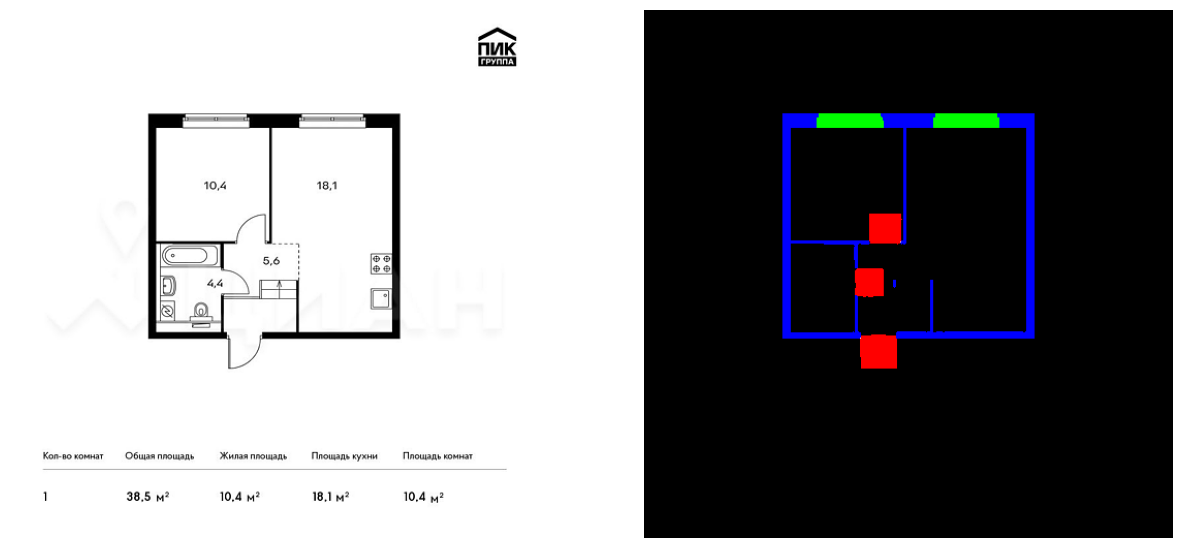

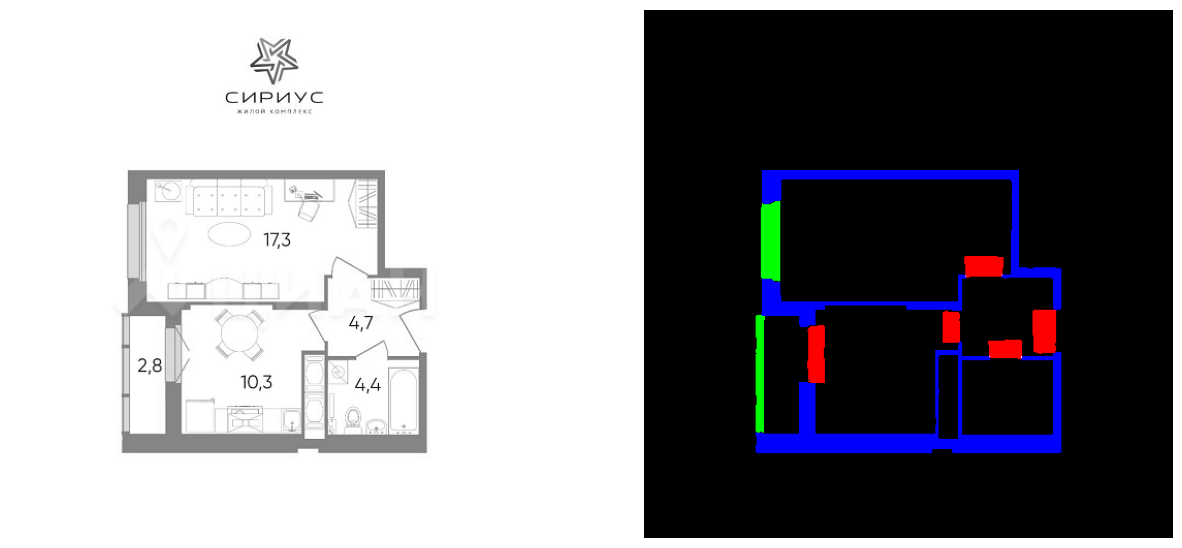

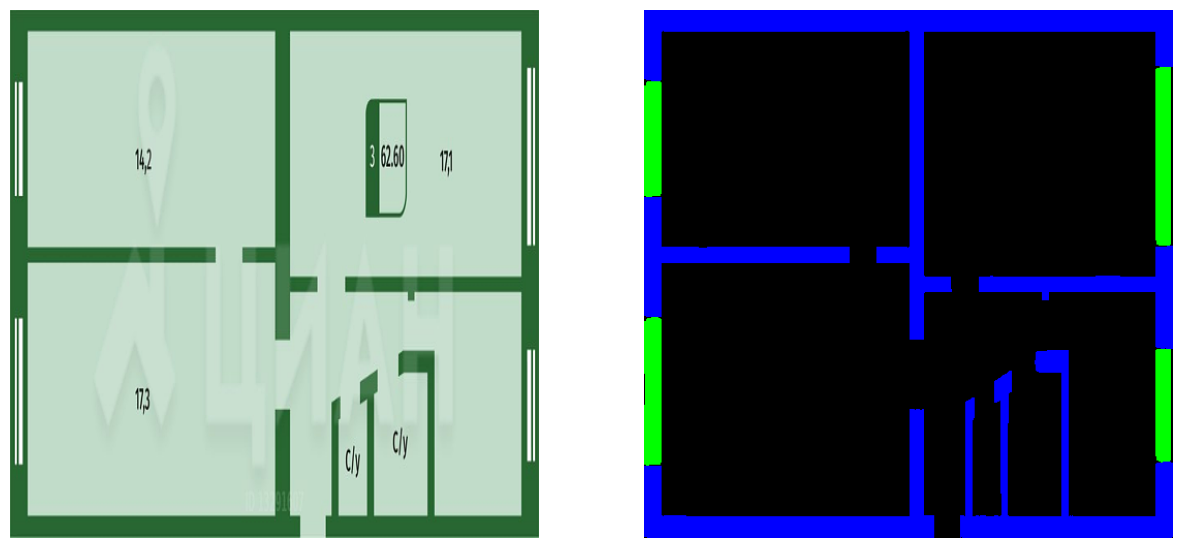

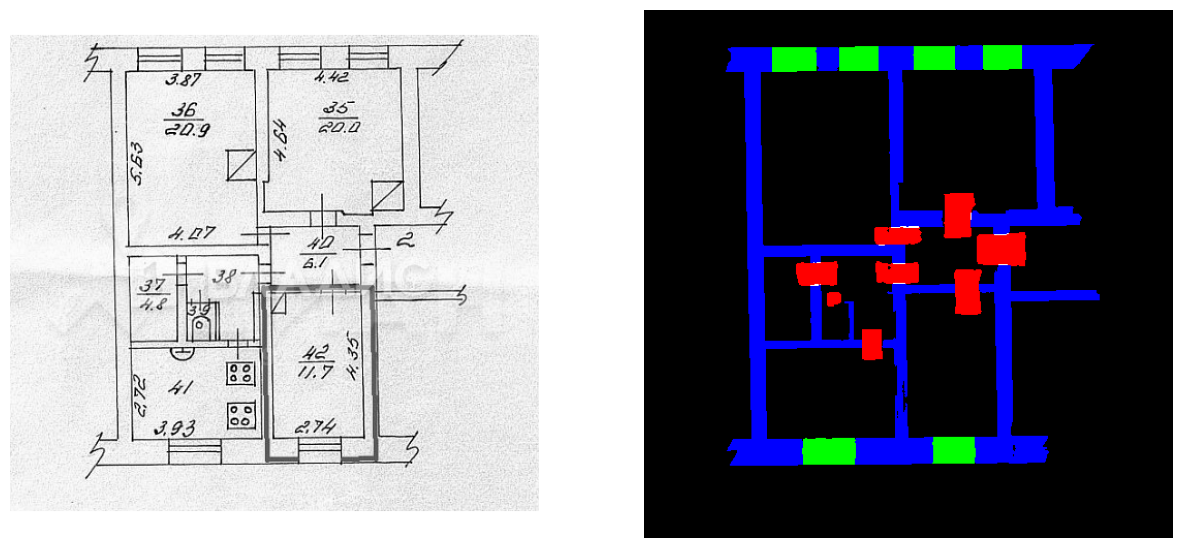

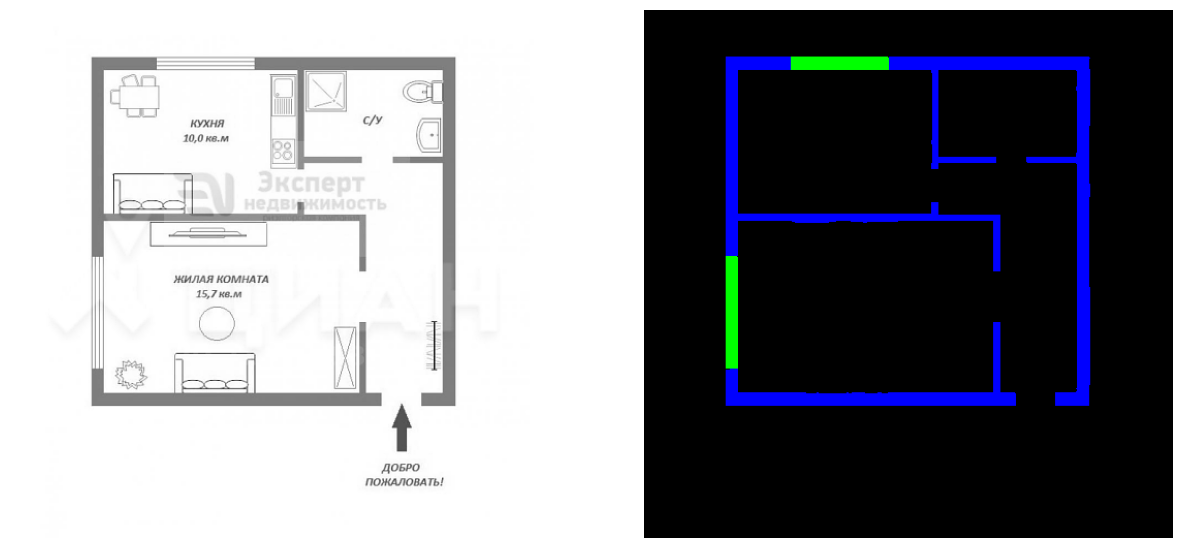

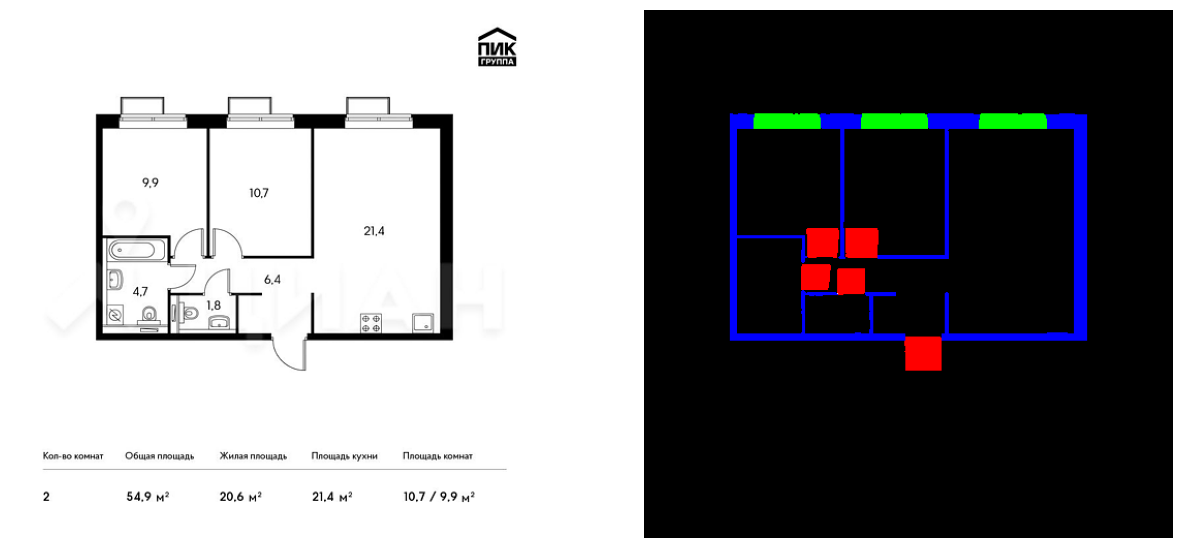

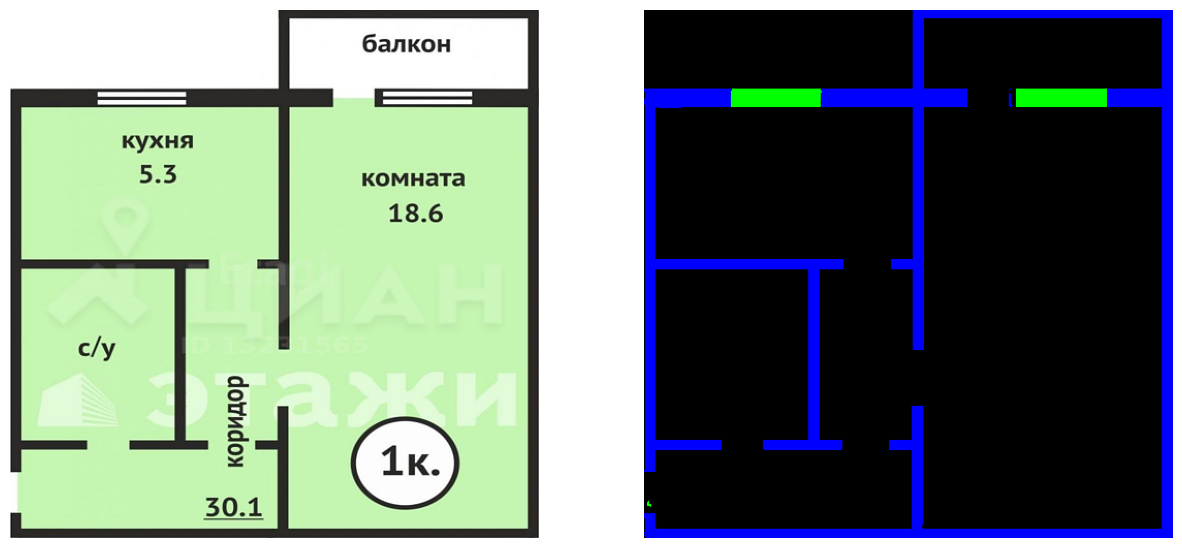

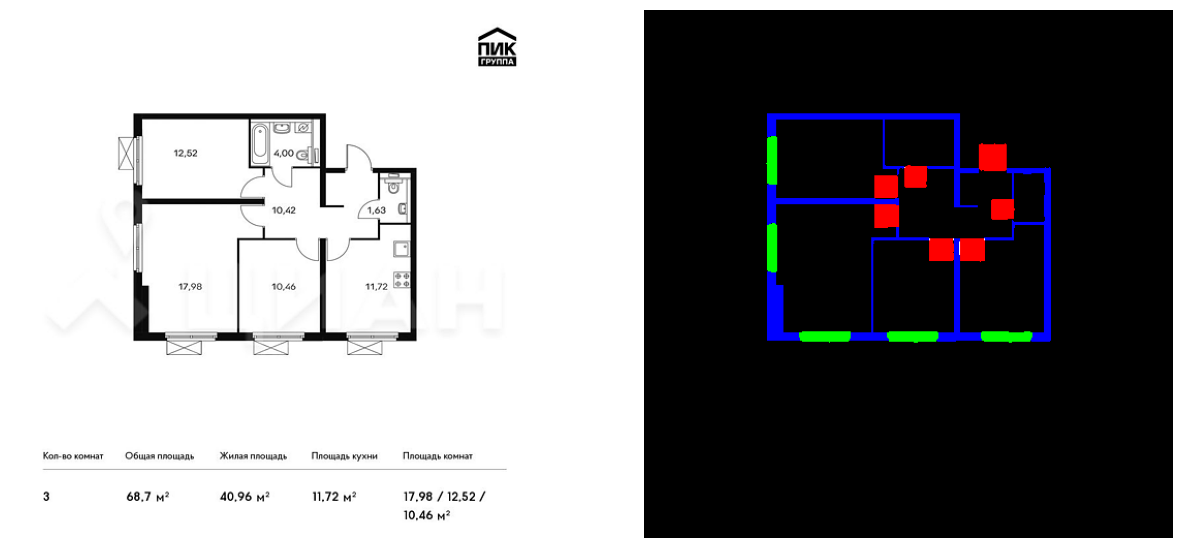

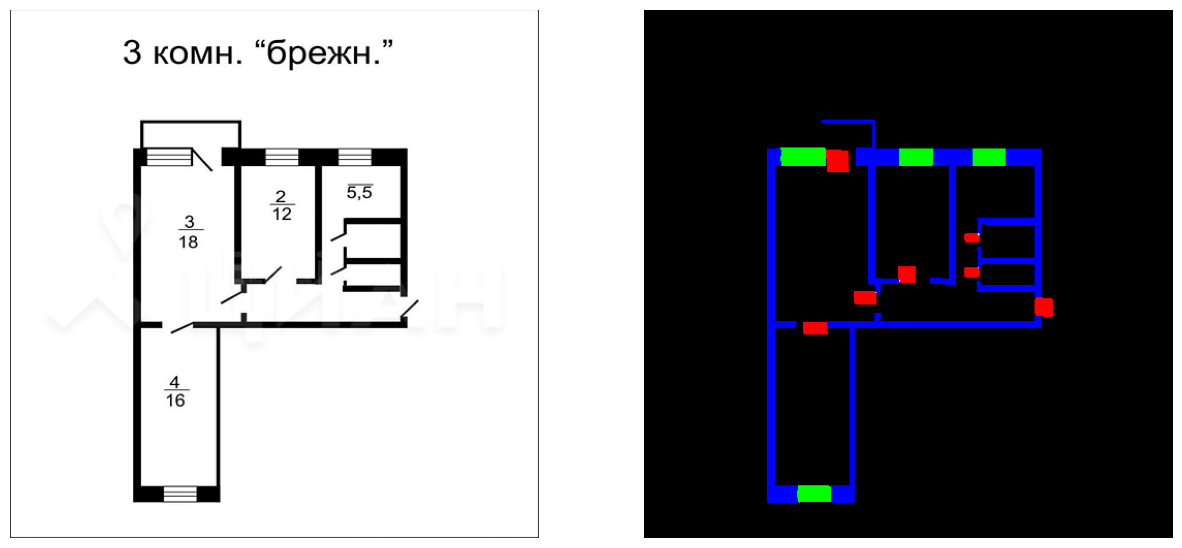

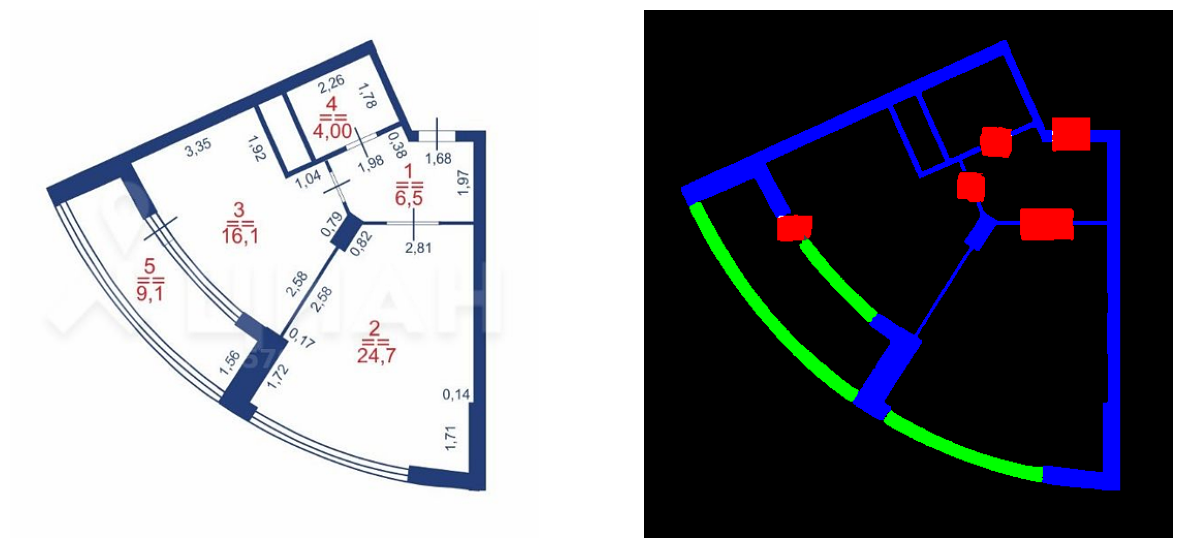

In [88]:
path = r'F:\Crimea\test'
names = os.listdir(path)
mask_door = np.zeros((512, 512, 3))
mask_wall = np.zeros((512, 512, 3))
mask_window = np.zeros((512, 512, 3))

factor = 1.5

for name in names[0:10]:    
    size = Image.open(os.path.join(path, name)).size
    img_path = os.path.join(path, name)
    img = Image.open(img_path).resize((512, 512))
    if len(img.size) == 2:
        img = img.convert('RGB')
    enhancer = ImageEnhance.Sharpness(img)
    img = enhancer.enhance(factor)

    img_tensor = np.array(img, dtype=np.float64)
    img_tensor = np.expand_dims(img_tensor, axis=0)

    img_tensor /= 255.
    
    pred_door_unet = models[0].predict(img_tensor)[0]
    pred_door_unet = np.uint8(pred_door_unet * 255)
    pred_door_unet[pred_door_unet > 128] = 80
    pred_door_unet[pred_door_unet != 80] = 0
    
    pred_door_pspnet = models[1].predict(img_tensor)[0]
    pred_door_pspnet = np.uint8(pred_door_pspnet * 255)
    pred_door_pspnet[pred_door_pspnet > 128] = 80
    pred_door_pspnet[pred_door_pspnet != 80] = 0
    
    pred_door = cv2.bitwise_and(pred_door_unet, pred_door_pspnet)
    
    mask_door[:,:,0] = pred_door[:,:,]
    mask_door[:,:,1] = pred_door[:,:,]
    mask_door[:,:,2] = pred_door[:,:,]

        
    pred_wall_unet = models[2].predict(img_tensor)[0]
    pred_wall_unet = np.uint8(pred_wall_unet * 255)
    pred_wall_unet[pred_wall_unet > 128] = 255
    pred_wall_unet[pred_wall_unet < 255] = 0
    
    pred_wall_pspnet = models[3].predict(img_tensor)[0]
    pred_wall_pspnet = np.uint8(pred_wall_pspnet * 255)
    pred_wall_pspnet[pred_wall_pspnet > 128] = 255
    pred_wall_pspnet[pred_wall_pspnet < 255] = 0
    
    pred_wall = cv2.bitwise_and(pred_wall_unet, pred_wall_pspnet)
    
    mask_wall[:,:,0] = pred_wall
    mask_wall[:,:,1] = pred_wall
    mask_wall[:,:,2] = pred_wall
    

    pred_window = models[4].predict(img_tensor)[0]
    pred_window = cv2.resize(pred_window, (512, 512))
    pred_window = np.uint8(pred_window * 255)
    pred_window[pred_window > 128] = 160
    pred_window[pred_window != 160] = 0
    
    
    mask_window[:,:,0] = pred_window
    mask_window[:,:,1] = pred_window
    mask_window[:,:,2] = pred_window

    mask_door = cv2.resize(mask_door, (512, 512))
    mask_wall = cv2.resize(mask_wall, (512, 512))
    mask_window = cv2.resize(mask_window, (512, 512))
    
    masked = cv2.bitwise_or(mask_wall, mask_window)
    masked = np.uint8(cv2.bitwise_or(masked, mask_door))
    
    im = np.array(Image.fromarray(masked).convert("RGB"))
    for i in range(len(im)):
        for j in range(len(im[i])):
            if list(im[i][j]) == [255, 255, 255]:
                im[i][j] = [0, 0, 255]
            elif list(im[i][j]) == [160, 160, 160]:
                im[i][j] = [0, 255, 0]
            elif list(im[i][j]) == [80, 80, 80]:
                im[i][j] = [255, 0, 0]
            
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 7))
    ax1.imshow(img)
    ax1.axis('off')
    ax2.imshow(im)
    ax2.axis('off')
    plt.show()